# Medical Insurance Costs

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Check for missing values and duplicates

In [41]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values found

In [42]:
df.duplicated().sum()

1

In [43]:
df.drop_duplicates(inplace=True)

Removed one duplicate

### Exploratory data analysis (EDA)

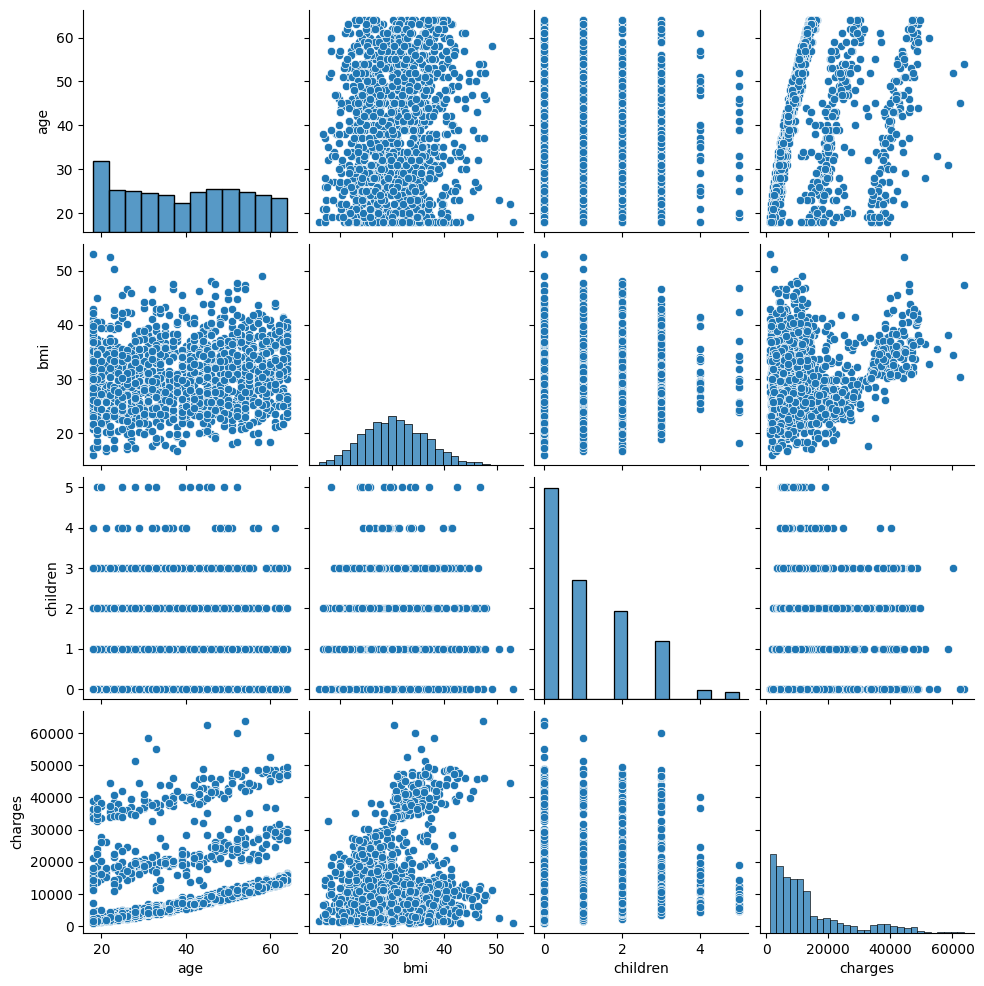

In [44]:
sns.pairplot(df)
plt.show()

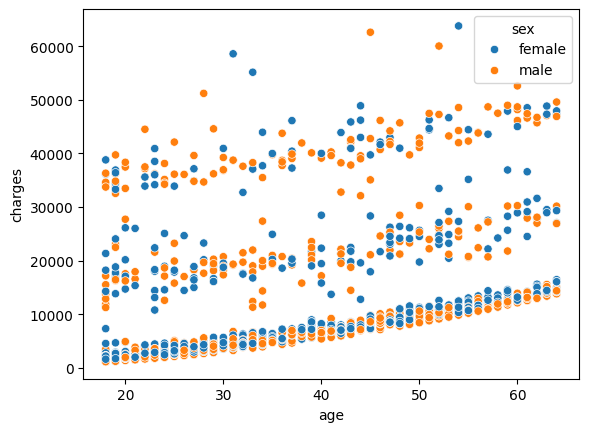

In [46]:
sns.scatterplot(data=df, x='age', y='charges', hue='sex')
plt.show()

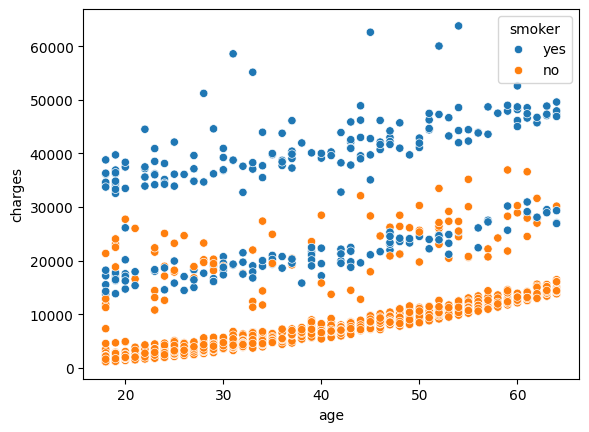

In [47]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.show()

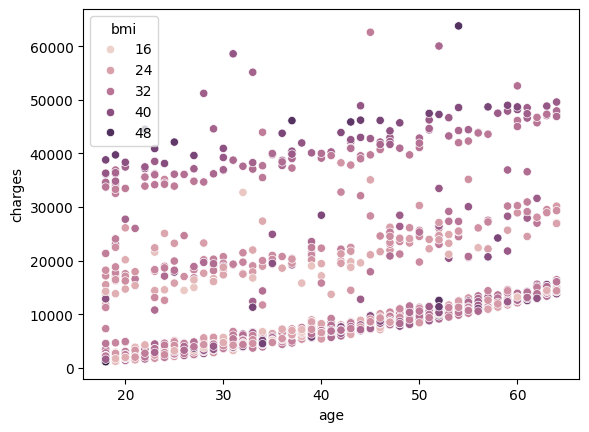

In [48]:
sns.scatterplot(data=df, x='age', y='charges', hue='bmi')
plt.show()

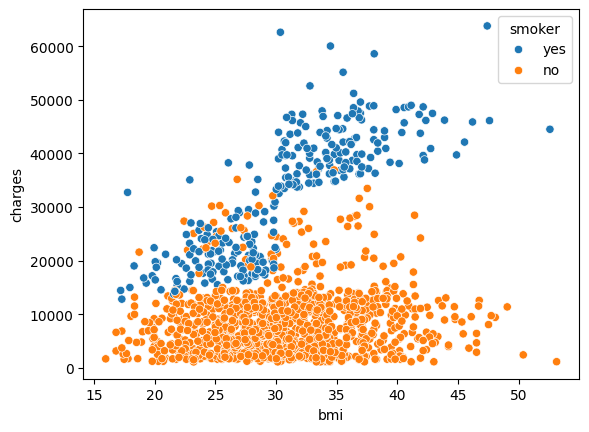

In [49]:
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.show()

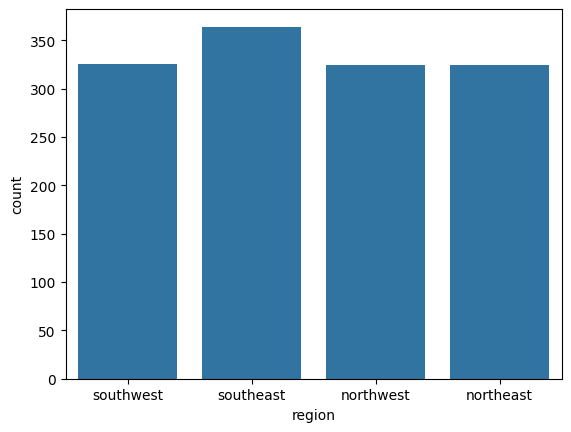

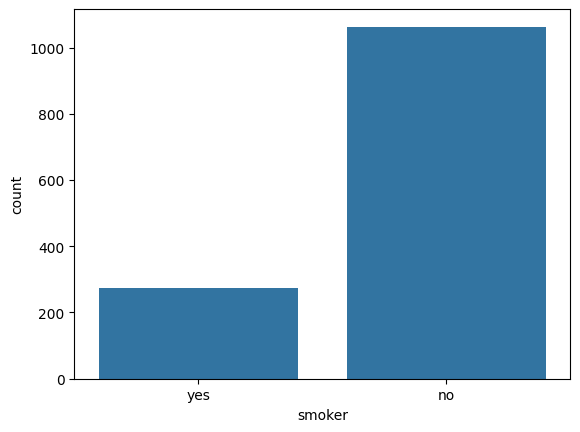

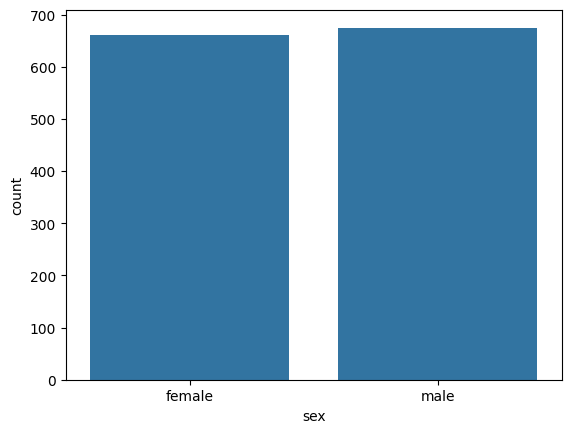

In [51]:
for i in ['region', 'smoker', 'sex']:  
  sns.countplot(df, x=i)
  plt.show()
        

### Handling categorical values

In [326]:
mdf = df.copy()

Label encoding for smoker and sex columns

In [327]:
mdf['smoker'] = mdf['smoker'].map({'no':0, 'yes':1})

mdf['sex'] = mdf['sex'].map({'female':0, 'male':1})

One hot encoding for region column

In [328]:
mdf = pd.get_dummies(mdf, columns=['region'])

In [329]:
mdf

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,False,True,False,False
1334,18,0,31.920,0,0,2205.98080,True,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,False,True
